<a href="https://colab.research.google.com/github/amaljithpapi/Unsupervised-learning-case-study/blob/main/Force_data_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/force2020_data.csv')
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [ ]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [ ]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [ ]:
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [11]:
df.drop('NPHI', axis=1, inplace=True)
df.drop('PEF', axis=1, inplace=True)

In [13]:
df['DTC'].fillna(df['DTC'].mean(), inplace=True)

<ipython-input-13-fa0c9ec1feaf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DTC'].fillna(df['DTC'].mean(), inplace=True)


In [14]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
DTC,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


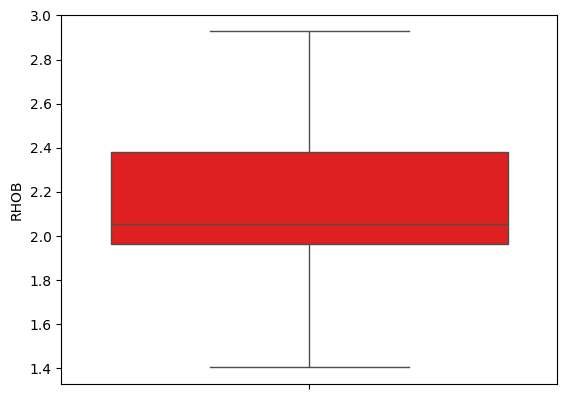

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


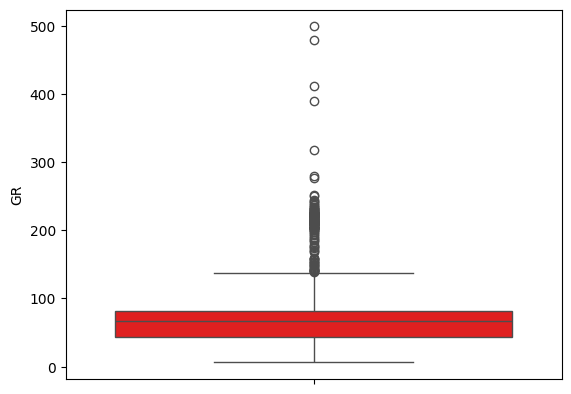

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


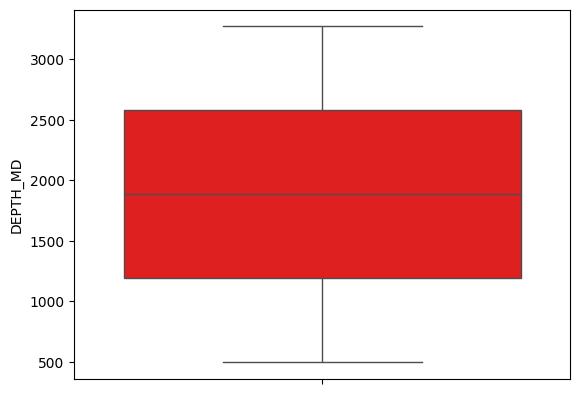

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


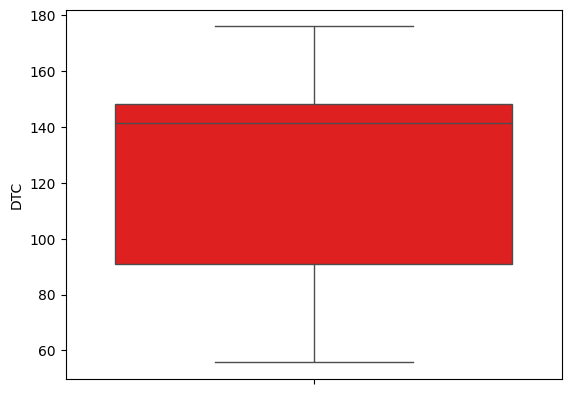

In [16]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    sns.boxplot(df[column], color ='red')
    plt.show()

In [17]:
Q1 = df['GR'].quantile(0.25)
Q3 = df['GR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['GR'] < lower_bound) | (df['GR'] > upper_bound)]
print(outliers['GR'])

14777    152.487183
14778    169.430511
14779    175.196609
14780    167.363678
14781    153.470978
            ...    
14919    147.066315
14920    142.472595
14921    141.150726
15535    146.297394
15536    150.266190
Name: GR, Length: 135, dtype: float64


In [18]:
outlier_columns = []
for col in df.columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  if df[col].min() < lower_limit or df[col].max() > upper_limit:
    outlier_columns.append(col)
print(outlier_columns)

['GR']


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [20]:
scaled_data = pd.DataFrame(x_scaled, columns=df.columns)
scaled_data

,RHOB,GR,DEPTH_MD,DTC
0,-0.759999,0.571087,-1.731721,1.179232e+00
1,-0.741163,0.538331,-1.731532,1.161958e+00
2,-0.718560,0.383248,-1.731342,1.147887e+00
3,-0.734045,0.315393,-1.731152,1.147096e+00
4,-0.773944,0.275241,-1.730963,1.146405e+00
...,...,...,...,...
18265,1.745819,-1.551518,1.731081,4.651740e-16
18266,1.789158,-1.480786,1.731271,4.651740e-16
18267,1.917421,-1.438792,1.731461,4.651740e-16
18268,2.109002,-1.452527,1.731650,4.651740e-16


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [23]:
pred_cluster = kmeans.predict(scaled_data)
pred_cluster

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

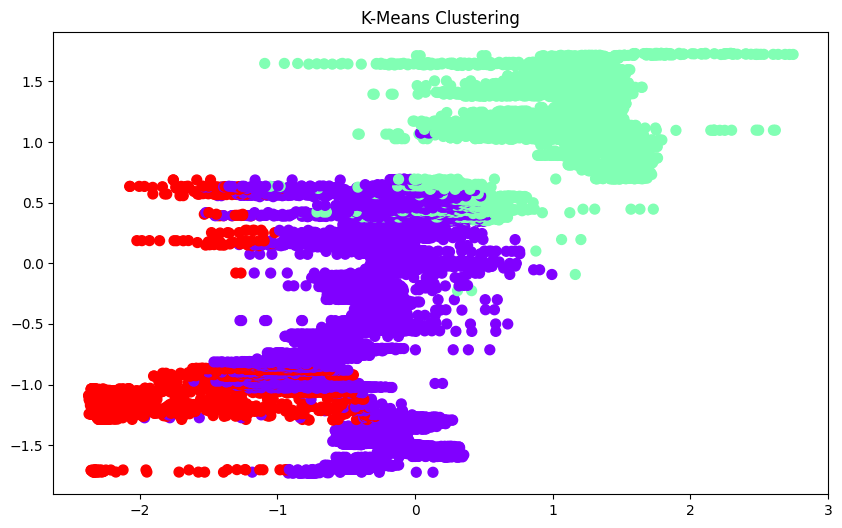

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data['RHOB'], scaled_data['DEPTH_MD'], c=pred_cluster, cmap = 'rainbow',s=50)
centroids = kmeans.cluster_centers_
plt.title('K-Means Clustering')
plt.show()

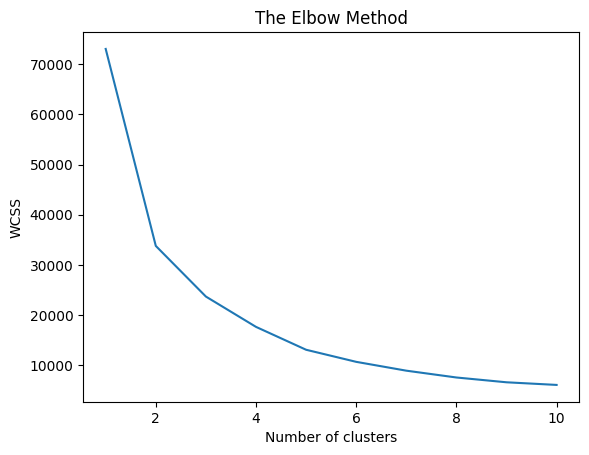

In [25]:
wcss = []
for i in  range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++',n_init = 10, random_state=42)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

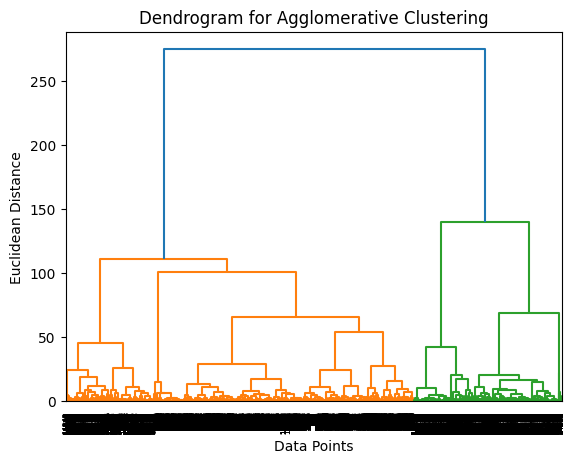

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(scaled_data, method = 'ward')
plt.figure()
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
